## Exercise 1

``A Soft Murmur'' is a web site that plays a mixture of natural
noise sources, including rain, waves, wind, etc.  At
http://asoftmurmur.com/about/ you can find their list
of recordings, most of which are at http://freesound.org.

Download a few of these files and compute the spectrum of each
signal.  Does the power spectrum look like white noise, pink noise,
or Brownian noise?  How does the spectrum vary over time?

In [222]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve

    urlretrieve("https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py", "thinkdsp.py")

In [223]:
import numpy as np
from thinkdsp import decorate

#### Wind

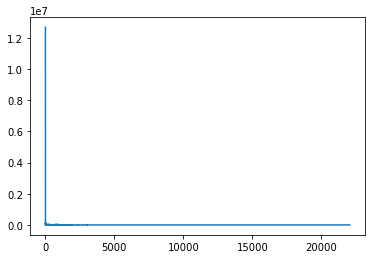

In [224]:
from thinkdsp import read_wave

wave = read_wave('Sounds/127596__juskiddink__wind-in-birch-trees-a-passing-sheep.wav')

segment = wave.segment(start=1.5, duration=1.0)

spectrum = segment.make_spectrum()
spectrum.plot_power()

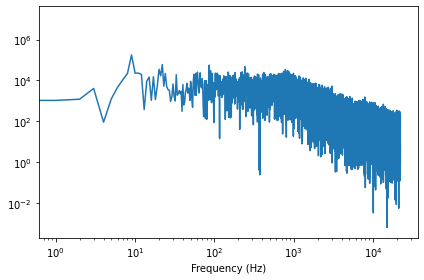

In [225]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

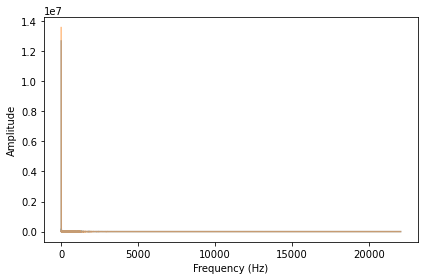

In [226]:
segment2 = wave.segment(start=2.5, duration=1.0)
spectrum2 = segment2.make_spectrum()

spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

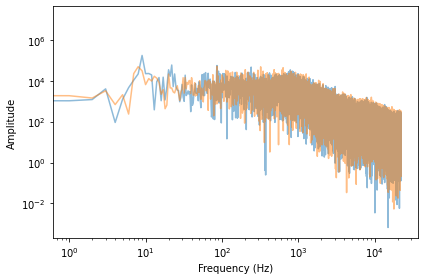

In [227]:
spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude', **loglog)

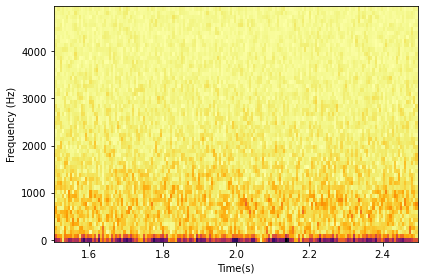

In [228]:
segment.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

#### Sea

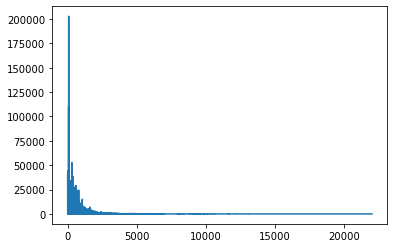

In [229]:
wave = read_wave('Sounds/13793__soarer__north-sea.wav')

segment = wave.segment(start=1.5, duration=1.0)

spectrum = segment.make_spectrum()
spectrum.plot_power()

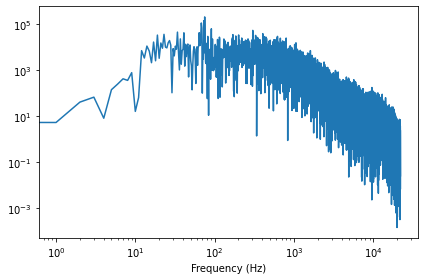

In [230]:
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', **loglog)

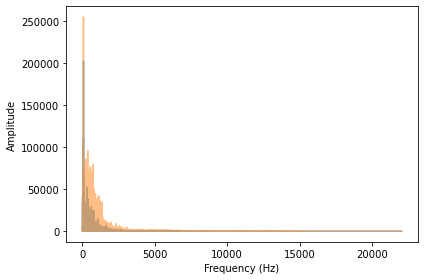

In [231]:
segment2 = wave.segment(start=2.5, duration=1.0)
spectrum2 = segment2.make_spectrum()

spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

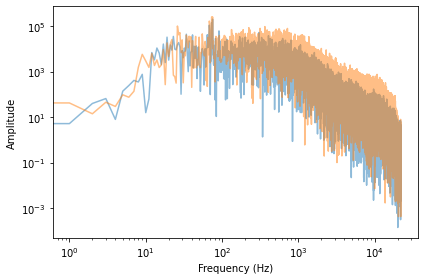

In [232]:
spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude', **loglog)

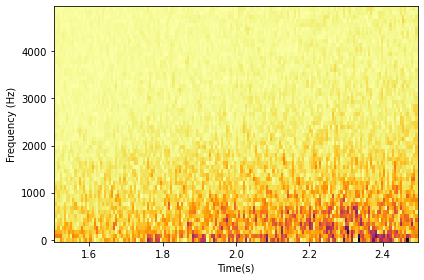

In [233]:
segment.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

## Exercise 2

In a noise signal, the mixture of frequencies changes over time.
In the long run, we expect the power at all frequencies to be equal,
but in any sample, the power at each frequency is random.

To estimate the long-term average power at each frequency, we can
break a long signal into segments, compute the power spectrum for each segment, and then compute the average across
the segments.  You can read more about this algorithm at
http://en.wikipedia.org/wiki/Bartlett's_method.

Implement Bartlett's method and use it to estimate the power
spectrum for a noise wave.  Hint: look at the implementation
of `make_spectrogram`.

In [234]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length=512, win_flag=True):
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    psds = [spectrum.power for spectrum in spectrums]
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

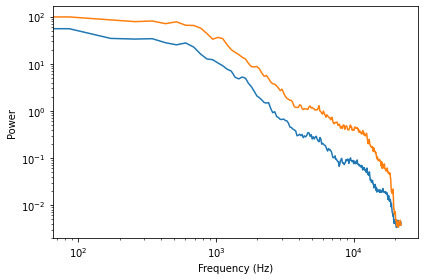

In [235]:
psd = bartlett_method(segment)
psd2 = bartlett_method(segment2)

psd.plot_power()
psd2.plot_power()

decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

## Exercise 2

At [coindesk](https://www.coindesk.com/price/bitcoin) you can download the daily price of a BitCoin as a CSV file.  Read this file and compute
the spectrum of BitCoin prices as a function of time.
Does it resemble white, pink, or Brownian noise?

In [236]:
import pandas as pd

data = pd.read_csv('Res/BTC_USD_2013-10-01_2021-05-04-CoinDesk.csv',
                   parse_dates=[0])
data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2767,BTC,2021-04-30,53260.295341,54893.871669,55224.907956,52403.743608
2768,BTC,2021-05-01,57302.646424,53598.879503,57434.933127,53097.762794
2769,BTC,2021-05-02,57677.975222,57741.020910,58511.256049,57062.700071
2770,BTC,2021-05-03,56427.043125,57824.300187,57925.741567,56123.039508


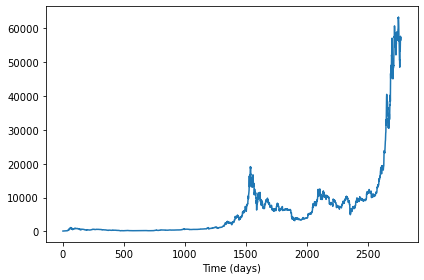

In [237]:
ys = data['Closing Price (USD)']
ts = data.index

from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

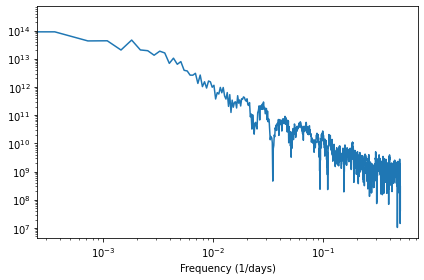

In [238]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)', **loglog)

In [239]:
spectrum.estimate_slope()[0]

-1.7835653687618445

## Exercise 3

A Geiger counter is a device that detects radiation. When an ionizing particle strikes the detector, it outputs a surge of current. The total output at a point in time can be modeled as uncorrelated Poisson (UP) noise, where each sample is a random quantity from a Poisson distribution, which corresponds to the number of particles detected during an interval.

Write a class called `UncorrelatedPoissonNoise` that inherits from ` _Noise` and provides `evaluate`. It should use `np.random.poisson` to generate random values from a Poisson distribution. The parameter of this function, `lam`, is the average number of particles during each interval. You can use the attribute `amp` to specify `lam`. For example, if the framerate is 10 kHz and `amp` is 0.001, we expect about 10 “clicks” per second.

Generate about a second of UP noise and listen to it. For low values of `amp`, like 0.001, it should sound like a Geiger counter. For higher values it should sound like white noise. Compute and plot the power spectrum to see whether it looks like white noise.

In [240]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

In [241]:
amp = 0.001
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

In [242]:
expected = amp * framerate * duration
actual = sum(wave.ys)
print(expected, actual)

10.0 6


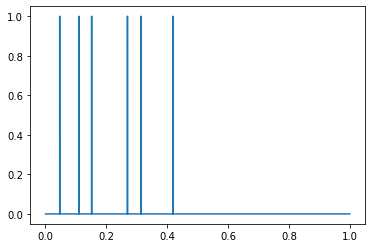

In [243]:
wave.plot()

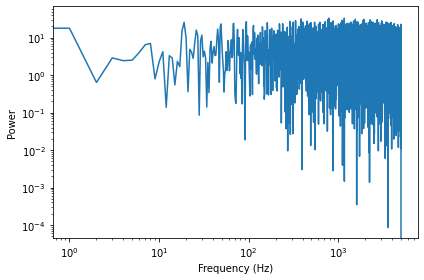

In [244]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [245]:
spectrum.estimate_slope().slope

C:\Users\ivkin\PycharmProjects\TelecomLabs\Lab4\thinkdsp.py:294: RuntimeWarning: divide by zero encountered in log
  y = np.log(self.power[1:])
C:\Users\ivkin\anaconda3\envs\TelecomLabs\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


nan

## Exercise 4

The algorithm in this chapter for generating pink noise is
conceptually simple but computationally expensive.  There are
more efficient alternatives, like the Voss-McCartney algorithm.
Research this method, implement it, compute the spectrum of
the result, and confirm that it has the desired relationship
between power and frequency.

In [246]:
def voss(nrows, ncols=16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)

    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

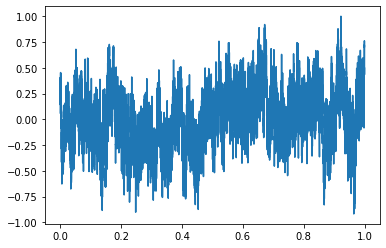

In [247]:
wave = Wave(voss(11025))
wave.unbias()
wave.normalize()
wave.plot()

In [248]:
wave.make_audio()

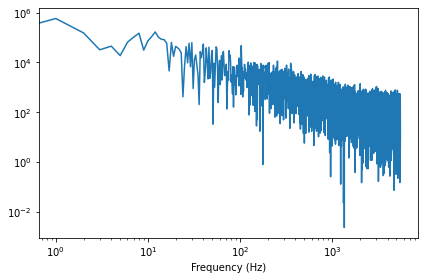

In [249]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         **loglog)

In [250]:
spectrum.estimate_slope().slope


-0.9871964607286926